<a href="https://colab.research.google.com/github/shreya-25/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
test=pd.read_csv('test.csv')
test.shape

(1459, 80)

In [5]:
train=pd.read_csv('train.csv')
train.shape

(1460, 81)

In [6]:
features_na = [features for features in train.columns if train[features].isnull().sum()>1]
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
for features in features_na:
  print(features, np.round(train[features].isnull().mean(),4)*100, ' % missing values')

LotFrontage 17.740000000000002  % missing values
Alley 93.77  % missing values
MasVnrType 0.5499999999999999  % missing values
MasVnrArea 0.5499999999999999  % missing values
BsmtQual 2.53  % missing values
BsmtCond 2.53  % missing values
BsmtExposure 2.6  % missing values
BsmtFinType1 2.53  % missing values
BsmtFinType2 2.6  % missing values
FireplaceQu 47.260000000000005  % missing values
GarageType 5.55  % missing values
GarageYrBlt 5.55  % missing values
GarageFinish 5.55  % missing values
GarageQual 5.55  % missing values
GarageCond 5.55  % missing values
PoolQC 99.52  % missing values
Fence 80.75  % missing values
MiscFeature 96.3  % missing values


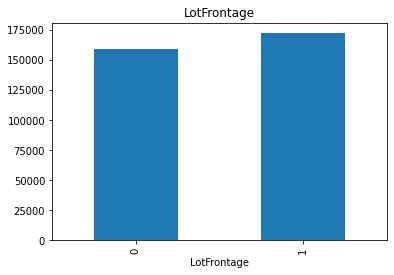

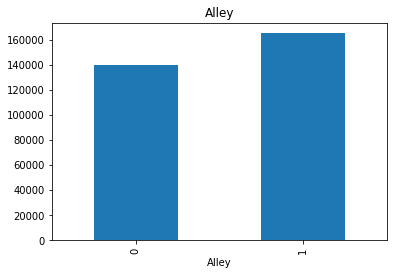

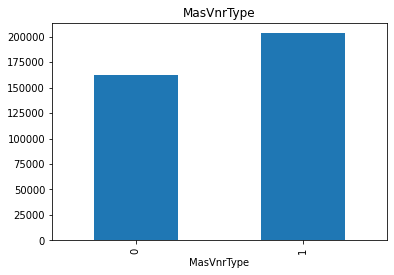

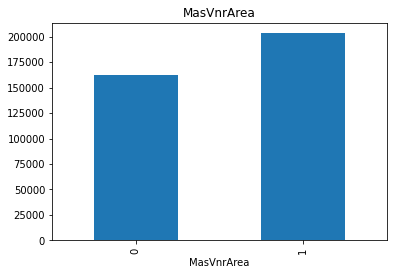

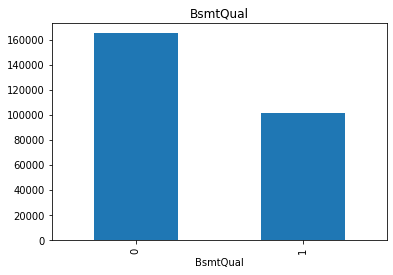

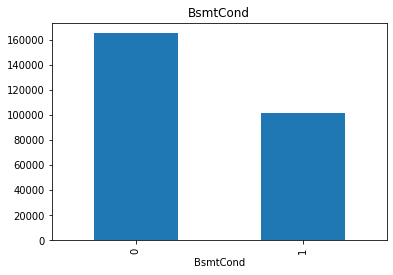

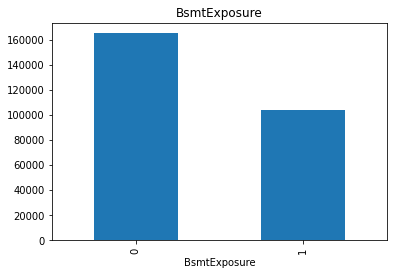

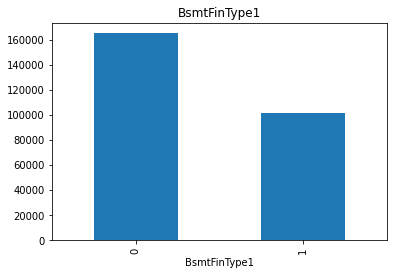

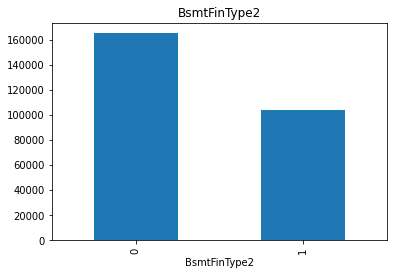

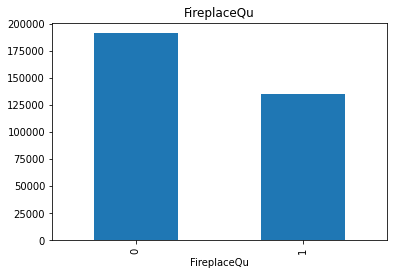

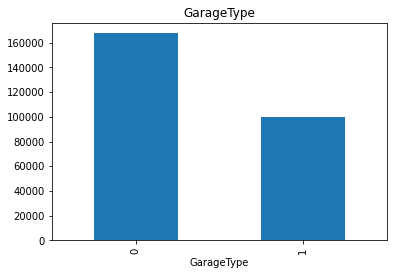

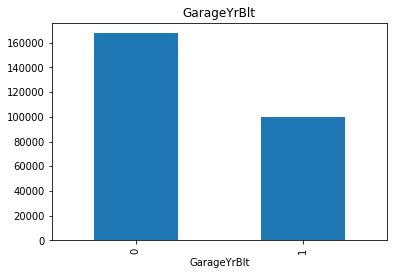

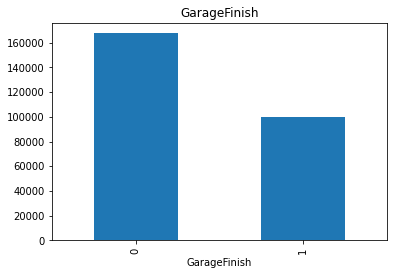

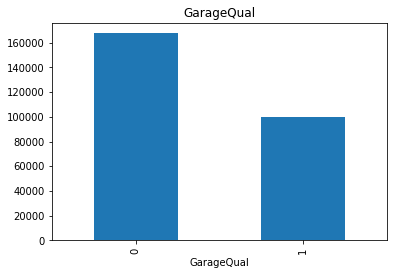

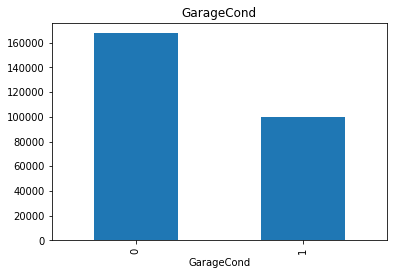

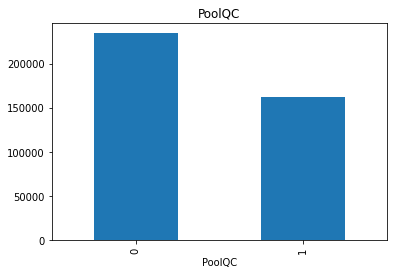

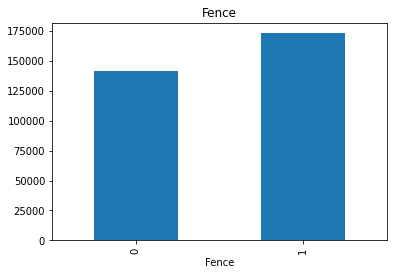

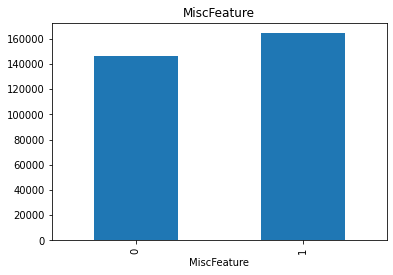

In [11]:
for features in features_na:
  data=train.copy()
  data[features]= np.where(data[features].isnull(),1,0)
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.title(features)
  plt.show()


In [12]:
print('count of id {}'.format(len(train.Id)))

count of id 1460


In [13]:
numerical_feature= [feature for feature in train.columns if train[feature].dtypes!='O']
print(len(numerical_feature))

38


In [14]:
# no of columns that store year information( ie if variable contain year or yr in its name)
no_of_yr_features= [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
no_of_yr_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs Year Sold')

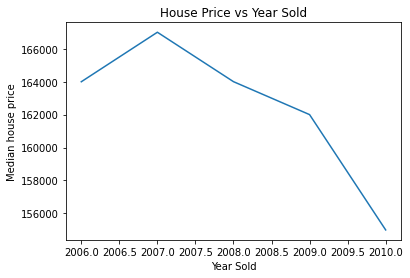

In [15]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median house price')
plt.title('House Price vs Year Sold')

In [ ]:
for feature in no_of_yr_features:
  if feature!='YrSold':
    